In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../data/twitter_training.csv', names=['Tweet_ID','Game','target','text'])
df

,Tweet_ID,Game,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.shape

(74682, 4)

In [24]:
print(f'Number of unique games in DataSet {len(np.unique(df.Game.values))}')

Number of unique games in DataSet 32


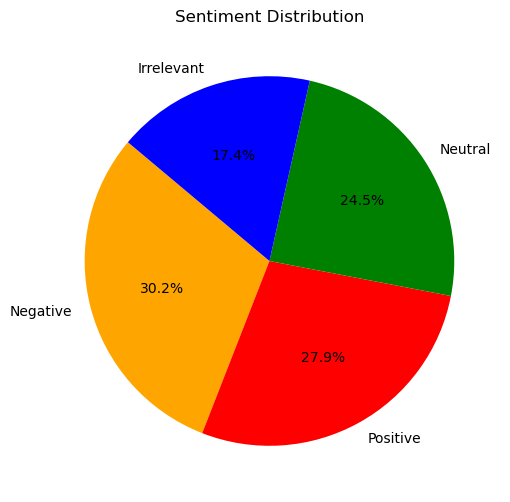

In [32]:
colors = ['orange', 'red', 'green', 'blue']
sentiment_counts = df['target'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')
plt.show()

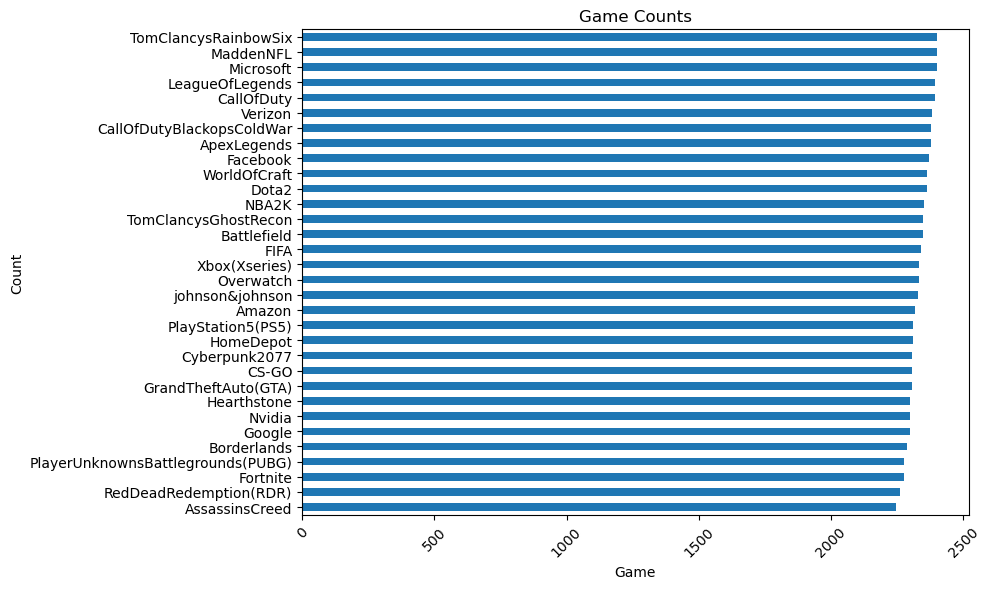

In [37]:
game_counts = df['Game'].value_counts()
game_counts = game_counts.sort_values()
plt.figure(figsize=(10, 6))
game_counts.plot(kind='barh')
plt.title('Game Counts')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

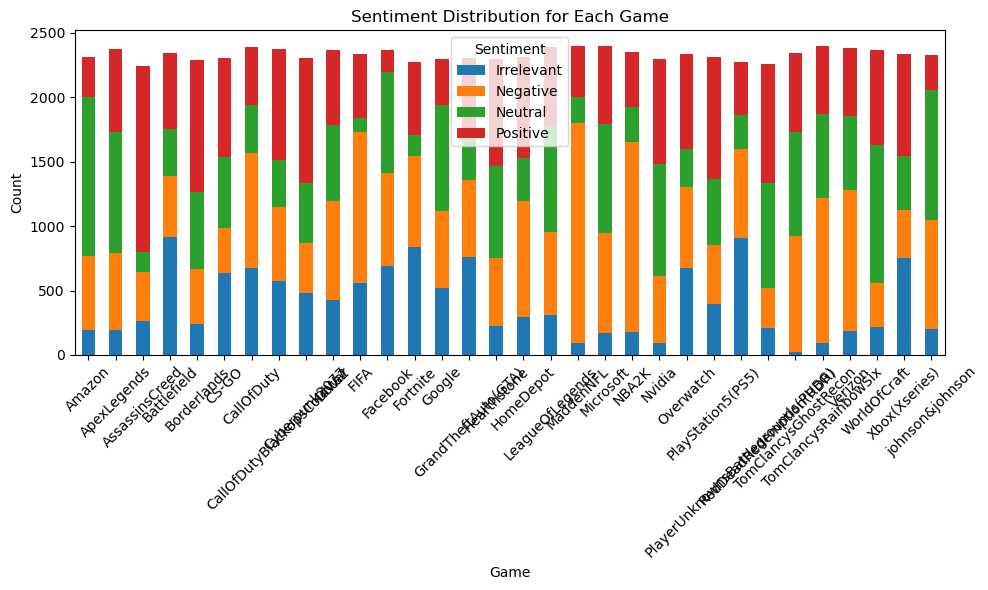

In [31]:
game_sentiment_counts = df.groupby(['Game', 'target']).size().unstack()
game_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution for Each Game')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

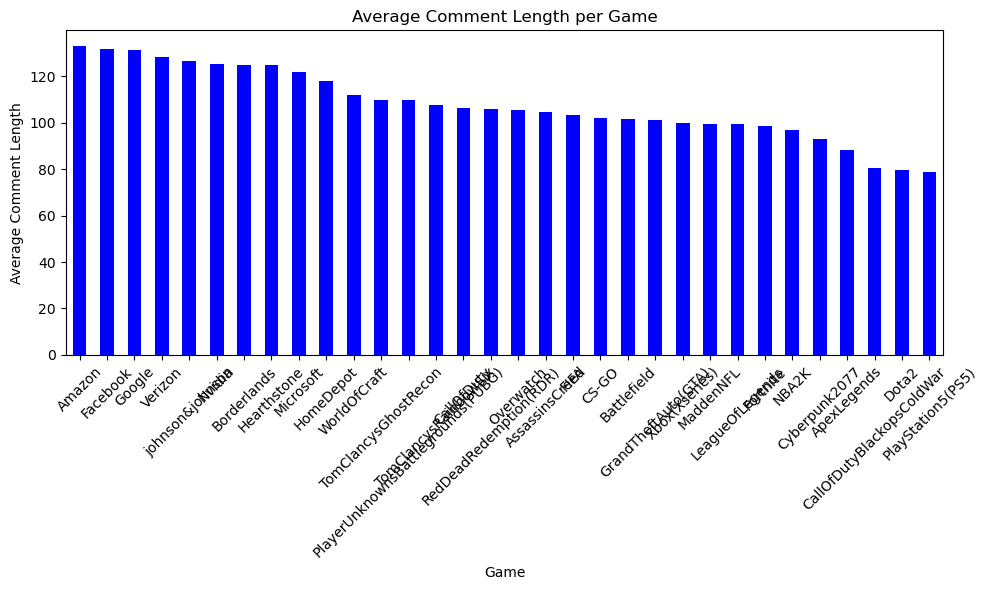

In [18]:
df['twit_Length'] = df['text'].apply(lambda x: len(str(x)))
average_comment_length = df.groupby('Game')['twit_Length'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_comment_length.plot(kind='bar', color='blue')
plt.title('Average Comment Length per Game')
plt.xlabel('Game')
plt.ylabel('Average Comment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

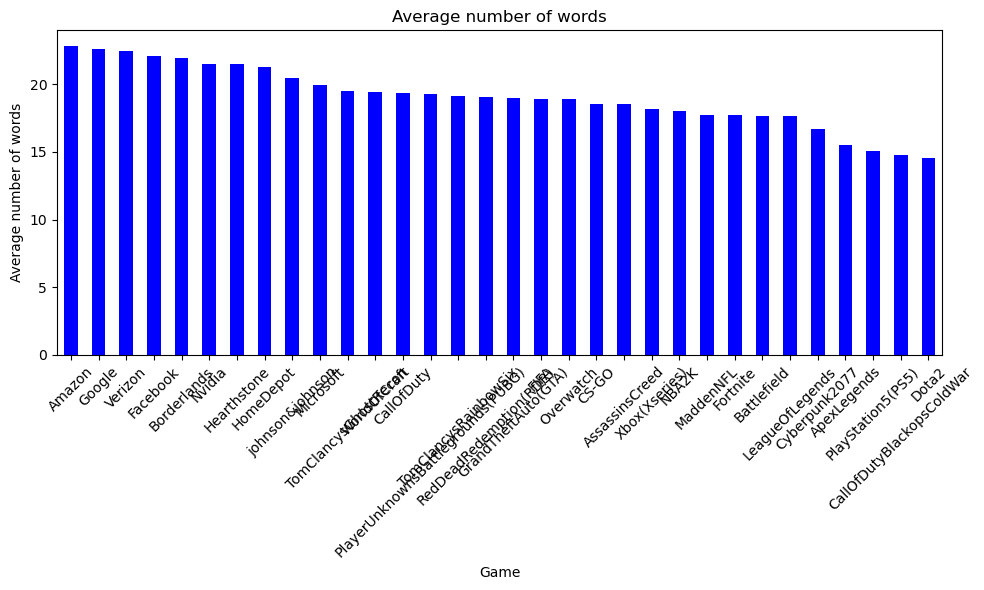

In [35]:
df['twit_words'] = df['text'].apply(lambda x: len(str(x).split()))
average_comment_length = df.groupby('Game')['twit_words'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_comment_length.plot(kind='bar', color='blue')
plt.title('Average number of words')
plt.xlabel('Game')
plt.ylabel('Average number of words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df

,Tweet_ID,Game,target,text,twit_Length,twit_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,12
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,10
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,10
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,12
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,26
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,23
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125,25
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159,32
